# Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import researchpy as rp
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
from collections import Counter
import itertools

In [2]:
#Display full contents of a dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Load Dataset

In [3]:
df=pd.read_csv('C:/Users/seagu/Downloads/bike_crash (1) (1).csv',na_values='Nan')

# Data Cleaning

In [12]:
df.head()

,$1000_Damage,Active_SchoolZone_Flag,At_Intersection_Flag,AverageDaily_Traffic_Amount,ConstructionZone_Flag,Crash_Severity,Crash_Time,Crash_Total_Injury_Count,Crash_Year,Day_of_Week,Highway_System,Intersection_Related,Light_Condition,Road_Class,Roadway_Part,Speed_Limit,Surface_Condition,Traffic_Control_Type,Weather_Condition,Person_Helmet
0,No,No,False,15262,No,Incapacitating Injury,239,1,2010,Friday,Farm To Market,Non Intersection,"Dark, Lighted",Farm To Market,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,No,No,False,NaN,No,Non-Incapacitating Injury,310,2,2010,Friday,NaN,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
2,No,No,False,NaN,No,Non-Incapacitating Injury,310,2,2010,Friday,NaN,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
3,No,No,False,NaN,No,Non-Incapacitating Injury,310,2,2010,Friday,NaN,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
4,No,No,False,22775,No,Non-Incapacitating Injury,2300,1,2010,Monday,State Loop,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,45,Dry,None,Clear,Not Worn


In [4]:
#change column names
df.rename(
    columns={ "$1000 Damage to Any One Person's Property": "$1000_Damage", "Active School Zone Flag": "Active_SchoolZone_Flag", "At Intersection Flag": "At_Intersection_Flag", "Average Daily Traffic Amount": "AverageDaily_Traffic_Amount",
    "Construction Zone Flag": "ConstructionZone_Flag", "Crash Severity": "Crash_Severity", "Crash Time": "Crash_Time","Crash Total Injury Count": "Crash_Total_Injury_Count", "Crash Year": "Crash_Year", "Day of Week": "Day_of_Week",
    "Highway System": "Highway_System", "Intersection Related": "Intersection_Related", "Light Condition": "Light_Condition",
    "Road Class": "Road_Class", "Roadway Part": "Roadway_Part", "Speed Limit": "Speed_Limit",
    "Surface Condition": "Surface_Condition", "Traffic Control Type": "Traffic_Control_Type",
    "Weather Condition": "Weather_Condition", "Person Helmet": "Person_Helmet"},
    inplace=True,
)

In [5]:
#Replace 'No Data' with Nans in Average Daily Traffic Amount, Highway System
df = df.replace("No Data", pd.np.nan)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   $1000_Damage                 2463 non-null   object
 1   Active_SchoolZone_Flag       2463 non-null   object
 2   At_Intersection_Flag         2463 non-null   bool  
 3   AverageDaily_Traffic_Amount  353 non-null    object
 4   ConstructionZone_Flag        2463 non-null   object
 5   Crash_Severity               2463 non-null   object
 6   Crash_Time                   2463 non-null   int64 
 7   Crash_Total_Injury_Count     2463 non-null   int64 
 8   Crash_Year                   2463 non-null   int64 
 9   Day_of_Week                  2463 non-null   object
 10  Highway_System               384 non-null    object
 11  Intersection_Related         2463 non-null   object
 12  Light_Condition              2463 non-null   object
 13  Road_Class                   2463

In [7]:
# AverageDaily_Traffic_Amount, Crash_Year to datetime convet datatype
df['AverageDaily_Traffic_Amount']=pd.to_numeric(df['AverageDaily_Traffic_Amount'], errors='coerce')
# df['Crash_Year']=pd.to_datetime(df['Crash_Year'].astype(str), format='%Y')


In [8]:
data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]

def display_data_description(data, Numerical_data_types, categorical_data_types):
    
    print("Data Description :")
    display(data.describe().T)
    display(data.describe(include=np.object).T)

display_data_description(df,data_types[0:4] ,data_types[4:7])

Data Description :


,count,mean,std,min,25%,50%,75%,max
AverageDaily_Traffic_Amount,353.0,70637.203966,55097.620447,4300.0,29304.0,38439.0,123443.0,197636.0
Crash_Time,2463.0,1404.700771,558.967560,1.0,1008.0,1532.0,1822.5,2358.0
Crash_Total_Injury_Count,2463.0,1.092164,1.208230,0.0,1.0,1.0,1.0,15.0
Crash_Year,2463.0,2013.403979,2.248480,2010.0,2011.0,2013.0,2015.0,2017.0
Speed_Limit,2463.0,26.410881,17.005282,-1.0,0.0,30.0,35.0,65.0


C:\Users\seagu\AppData\Local\Temp\ipykernel_24048\1043939486.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  display(data.describe(include=np.object).T)


,count,unique,top,freq
$1000_Damage,2463,2,No,1735
Active_SchoolZone_Flag,2463,2,No,2460
ConstructionZone_Flag,2463,2,No,2433
Crash_Severity,2463,5,Non-Incapacitating Injury,1474
Day_of_Week,2463,7,Friday,435
Highway_System,384,7,State Loop,161
Intersection_Related,2463,5,Intersection,869
Light_Condition,2463,7,Daylight,1716
Road_Class,2463,7,City Street,1840
Roadway_Part,2463,4,Main/Proper Lane,2144


In [9]:
#Draw Boxplot for all Numerical Values
numeric_columns=df.select_dtypes(include="number")

def Boxplot_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(dataset[data], ax=axs[i])
        axs[i].set_title('Boxplot of '+ data)

IndexError: index 4 is out of bounds for axis 0 with size 4

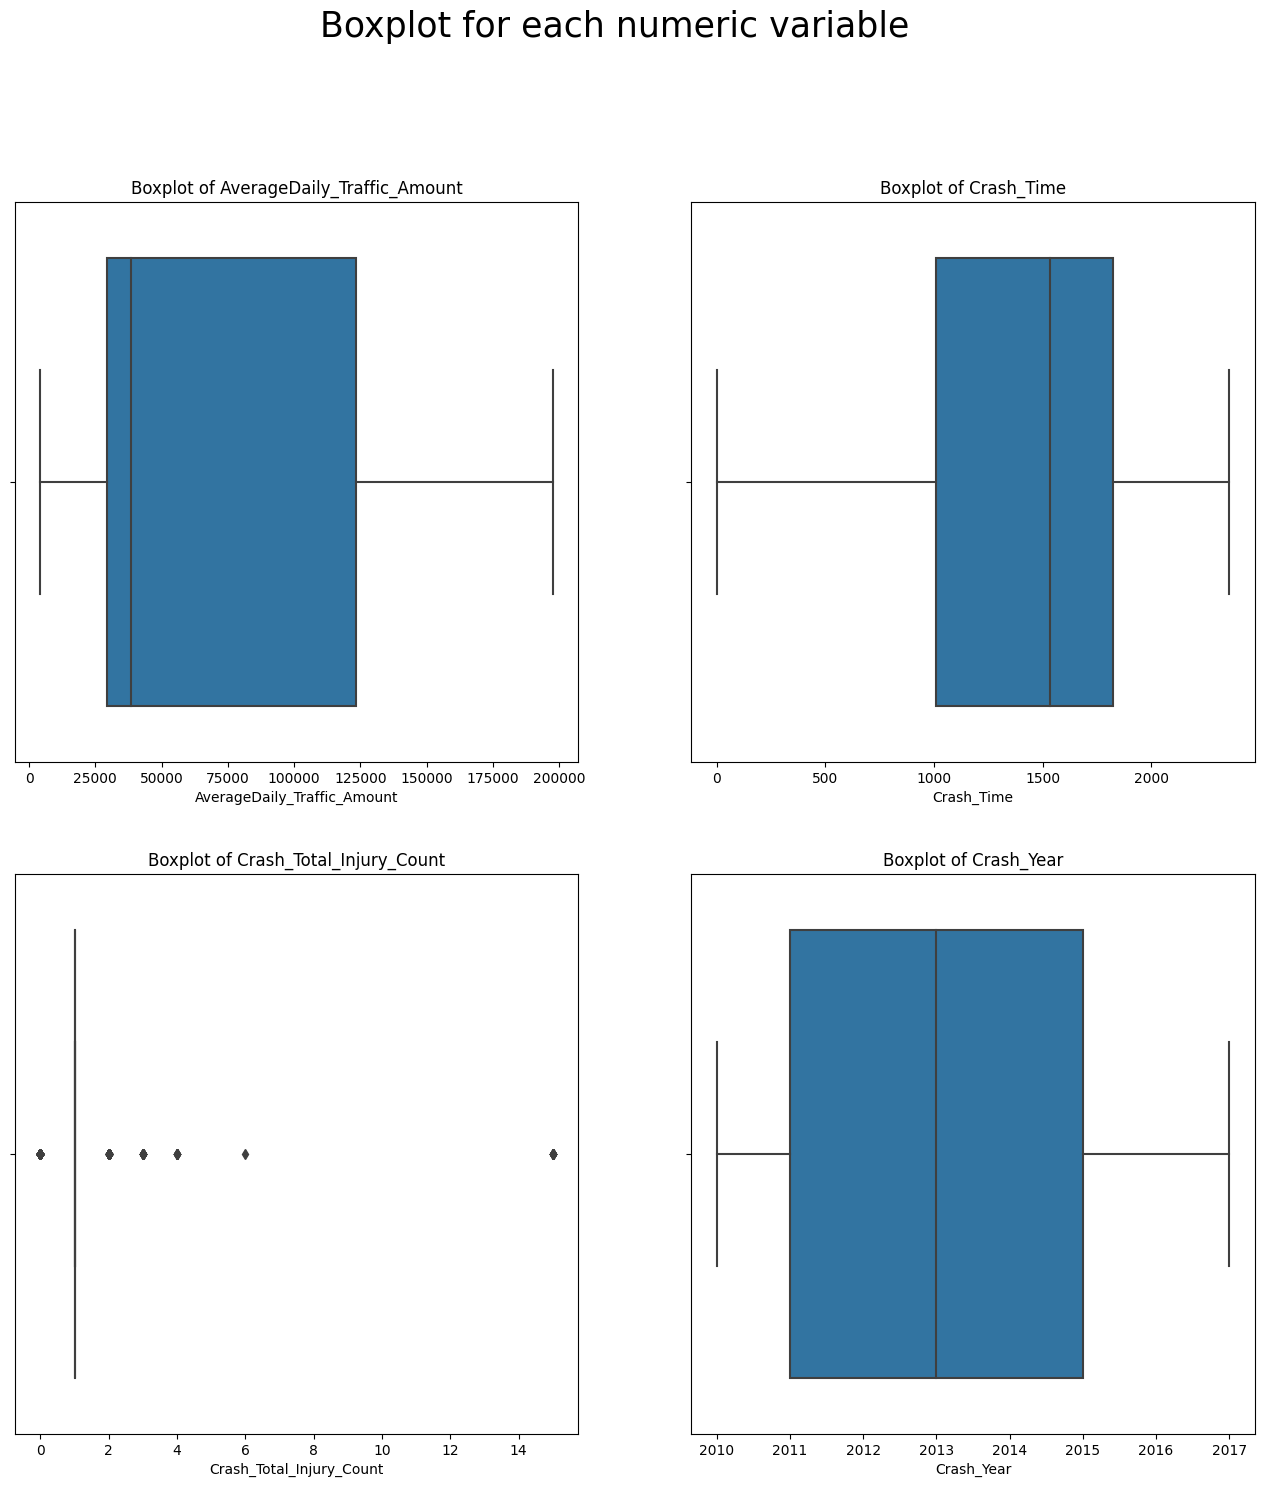

In [10]:
Boxplot_custom(dataset=df, columns_list=numeric_columns, rows=2, cols=2, suptitle='Boxplot for each numeric variable')
plt.tight_layout()

In [11]:
# remove outliers
df=df[df['Speed_Limit']>0]

In [12]:
#check missing value
null_df = df.isnull().sum() / df.shape[0] * 100
null_df

$1000_Damage                   0.000000 
Active_SchoolZone_Flag         0.000000 
At_Intersection_Flag           0.000000 
AverageDaily_Traffic_Amount    84.953829
ConstructionZone_Flag          0.000000 
Crash_Severity                 0.000000 
Crash_Time                     0.000000 
Crash_Total_Injury_Count       0.000000 
Crash_Year                     0.000000 
Day_of_Week                    0.000000 
Highway_System                 83.921782
Intersection_Related           0.000000 
Light_Condition                0.000000 
Road_Class                     0.000000 
Roadway_Part                   0.000000 
Speed_Limit                    0.000000 
Surface_Condition              0.000000 
Traffic_Control_Type           0.000000 
Weather_Condition              0.000000 
Person_Helmet                  0.000000 
dtype: float64

In [ ]:
#dealing missing values:



In [13]:
# check for unique value
def check_data_unique(df):
    for column in df.columns:
        uniques = df[column].unique()
        print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:10])
check_data_unique(df)

$1000_Damage             2	 ['No' 'Yes']
Active_SchoolZone_Flag     2	 ['No' 'Yes']
At_Intersection_Flag     2	 [False  True]
AverageDaily_Traffic_Amount    75	 [ 15262.     nan  22775.  34215. 160919.  44866. 115456.  33647. 123443.
 124466.]
ConstructionZone_Flag     2	 ['No' 'Yes']
Crash_Severity           5	 ['Incapacitating Injury' 'Non-Incapacitating Injury' 'Possible Injury'
 'Not Injured' 'Killed']
Crash_Time             887	 [ 239  310 2300 1715 1826 2104 1814 1124 1605 1739]
Crash_Total_Injury_Count     7	 [ 1  2  3  0 15  4  6]
Crash_Year               8	 [2010 2011 2012 2013 2014 2015 2016 2017]
Day_of_Week              7	 ['Friday' 'Monday' 'Thursday' 'Tuesday' 'Wednesday' 'Saturday' 'Sunday']
Highway_System           8	 ['Farm To Market' nan 'State Loop' 'Interstate' 'State Highway'
 'US Highway' 'Ranch To Mkt' 'State Spur']
Intersection_Related     5	 ['Non Intersection' 'Intersection Related' 'Intersection'
 'Driveway Access' 'Not Reported']
Light_Condition          7	 

In [14]:
# Check for duplicate 
print('Duplicated value(s) in our dataset : ', df.duplicated().sum())

Duplicated value(s) in our dataset :  78


In [15]:
#since all the missing value are less than 0.01%, we can just drop them
df=df.drop_duplicates()

# EDA

### Set Color Palette

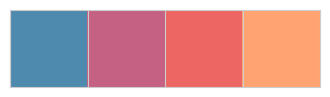

In [16]:
sns.set_style("whitegrid")
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [17]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom", fontsize = 7.5)

## Univariate Analysis

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1763 entries, 0 to 2462
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   $1000_Damage                 1763 non-null   object 
 1   Active_SchoolZone_Flag       1763 non-null   object 
 2   At_Intersection_Flag         1763 non-null   bool   
 3   AverageDaily_Traffic_Amount  269 non-null    float64
 4   ConstructionZone_Flag        1763 non-null   object 
 5   Crash_Severity               1763 non-null   object 
 6   Crash_Time                   1763 non-null   int64  
 7   Crash_Total_Injury_Count     1763 non-null   int64  
 8   Crash_Year                   1763 non-null   int64  
 9   Day_of_Week                  1763 non-null   object 
 10  Highway_System               287 non-null    object 
 11  Intersection_Related         1763 non-null   object 
 12  Light_Condition              1763 non-null   object 
 13  Road_Class        

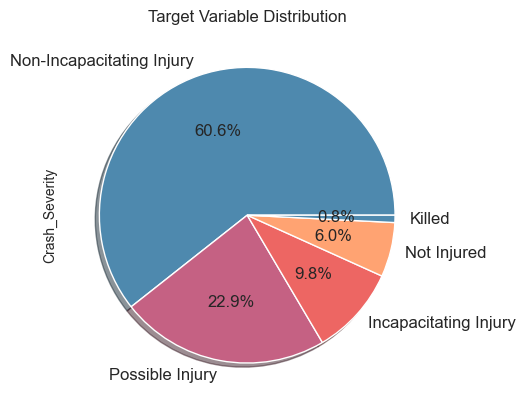

In [14]:
textprops = {"fontsize":12}

df['Crash_Severity'].value_counts().plot.pie(title="Target Variable Distribution",autopct='%1.1f%%',shadow=True,textprops =textprops)
plt.show()

### Continuous Data

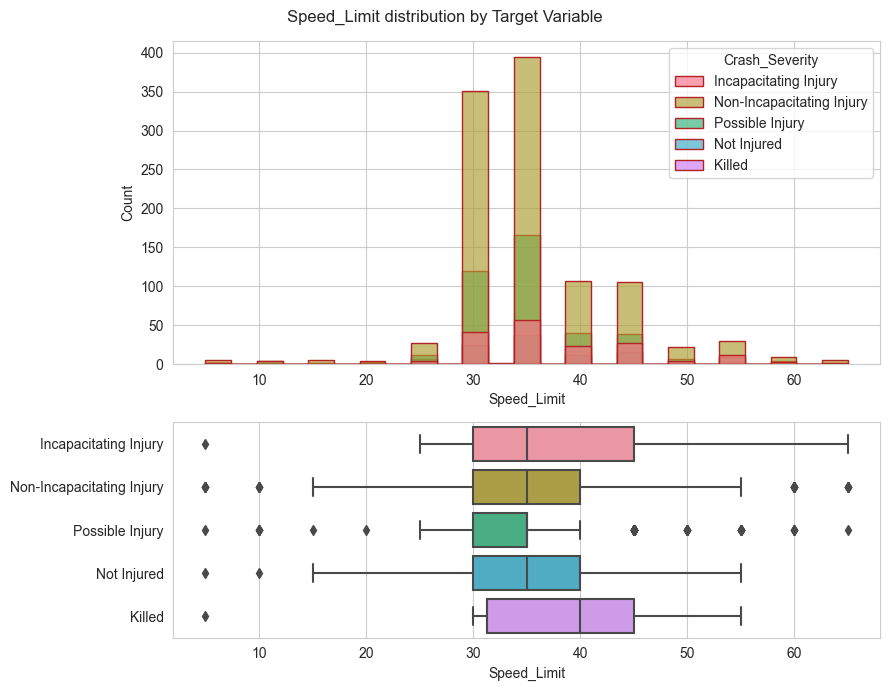

In [16]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 7),gridspec_kw={'height_ratios': (.6, .4)})

sns.histplot(data=df,x="Speed_Limit",hue='Crash_Severity',bins=25,alpha=0.66,edgecolor='firebrick',kde=False,ax=ax1)
sns.boxplot(x="Speed_Limit", y='Crash_Severity', data=df,ax=ax2)
ax2.set_ylabel('')

ax2.set_yticklabels(['Incapacitating Injury', 'Non-Incapacitating Injury', 'Possible Injury',
 'Not Injured', 'Killed'])
plt.suptitle("Speed_Limit distribution by Target Variable")
plt.tight_layout()

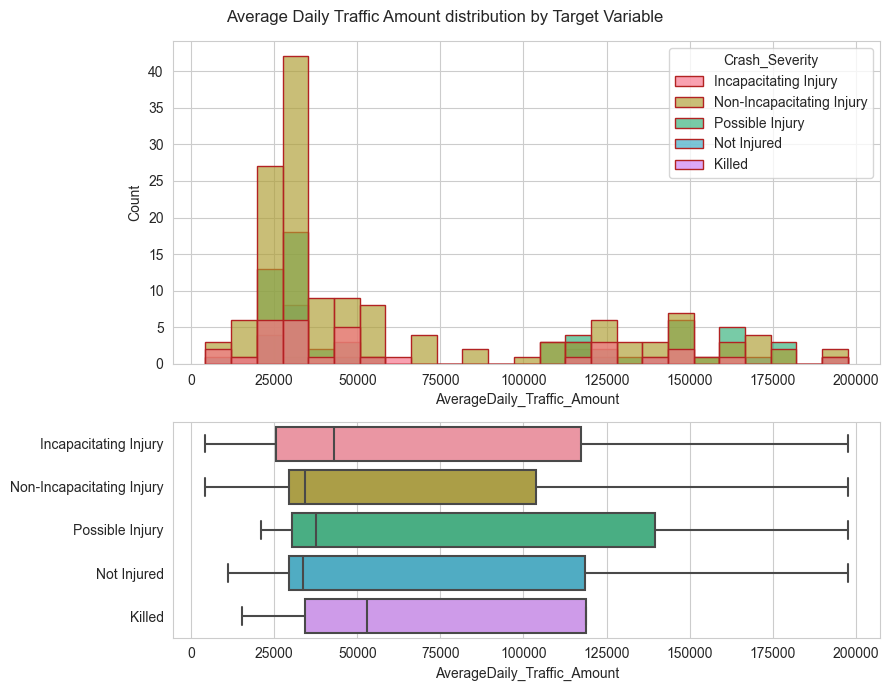

In [16]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 7),gridspec_kw={'height_ratios': (.6, .4)})

sns.histplot(data=df,x="AverageDaily_Traffic_Amount",hue='Crash_Severity',bins=25,alpha=0.66,edgecolor='firebrick',kde=False,ax=ax1)
sns.boxplot(x="AverageDaily_Traffic_Amount", y='Crash_Severity', data=df,ax=ax2)
ax2.set_ylabel('')

ax2.set_yticklabels(['Incapacitating Injury', 'Non-Incapacitating Injury', 'Possible Injury',
 'Not Injured', 'Killed'])
plt.suptitle("Average Daily Traffic Amount distribution by Target Variable")
plt.tight_layout()

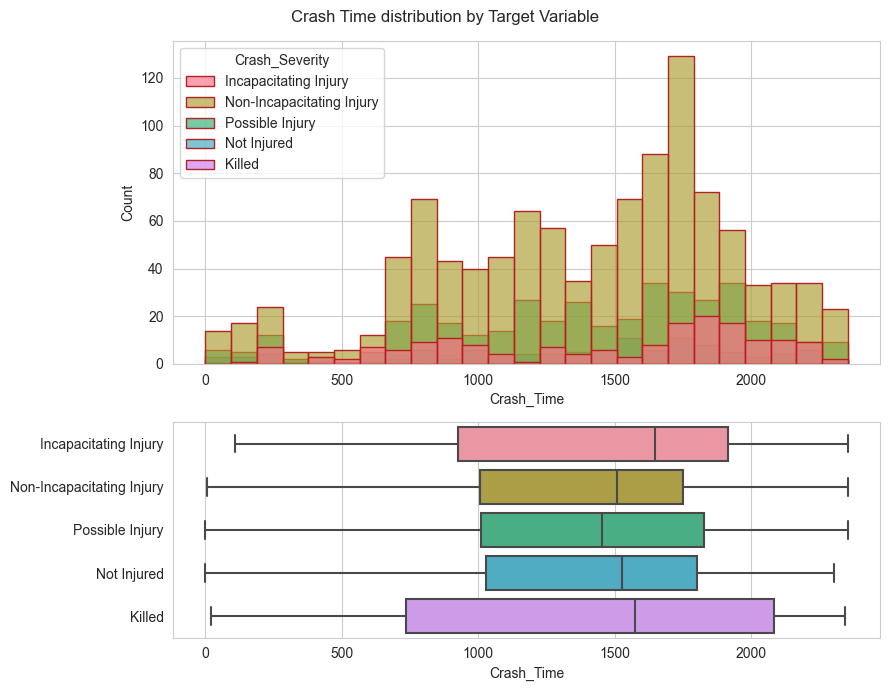

In [17]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 7),gridspec_kw={'height_ratios': (.6, .4)})

sns.histplot(data=df,x="Crash_Time",hue='Crash_Severity',bins=25,alpha=0.66,edgecolor='firebrick',kde=False,ax=ax1)
sns.boxplot(x="Crash_Time", y='Crash_Severity', data=df,ax=ax2)
ax2.set_ylabel('')

ax2.set_yticklabels(['Incapacitating Injury', 'Non-Incapacitating Injury', 'Possible Injury',
 'Not Injured', 'Killed'])
plt.suptitle("Crash Time distribution by Target Variable")
plt.tight_layout()

### Categorical Data

In [18]:
categorical_data=df.select_dtypes(exclude='number')
categorical_data.head()

,$1000_Damage,Active_SchoolZone_Flag,At_Intersection_Flag,ConstructionZone_Flag,Crash_Severity,Crash_Year,Day_of_Week,Highway_System,Intersection_Related,Light_Condition,Road_Class,Roadway_Part,Surface_Condition,Traffic_Control_Type,Weather_Condition,Person_Helmet
0,No,No,False,No,Incapacitating Injury,2010-01-01,Friday,Farm To Market,Non Intersection,"Dark, Lighted",Farm To Market,Main/Proper Lane,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,No,No,False,No,Non-Incapacitating Injury,2010-01-01,Friday,NaN,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,Dry,Center Stripe/Divider,Clear,Not Worn
4,No,No,False,No,Non-Incapacitating Injury,2010-01-01,Monday,State Loop,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,Dry,None,Clear,Not Worn
6,No,No,False,No,Non-Incapacitating Injury,2010-01-01,Thursday,NaN,Intersection Related,Daylight,City Street,Main/Proper Lane,Dry,Marked Lanes,Clear,"Worn, Unk Damage"
7,No,No,True,No,Non-Incapacitating Injury,2010-01-01,Tuesday,NaN,Intersection,"Dark, Lighted",City Street,Main/Proper Lane,Dry,Stop Sign,Clear,Not Worn


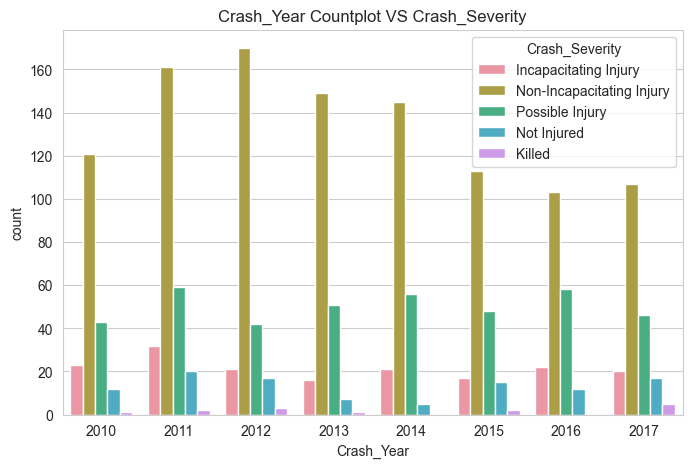

In [51]:
plt.figure(figsize=[8,5])
ax=sns.countplot(x='Crash_Year',hue='Crash_Severity',data=df)
plt.title('Crash_Year Countplot VS Crash_Severity')
plt.show()

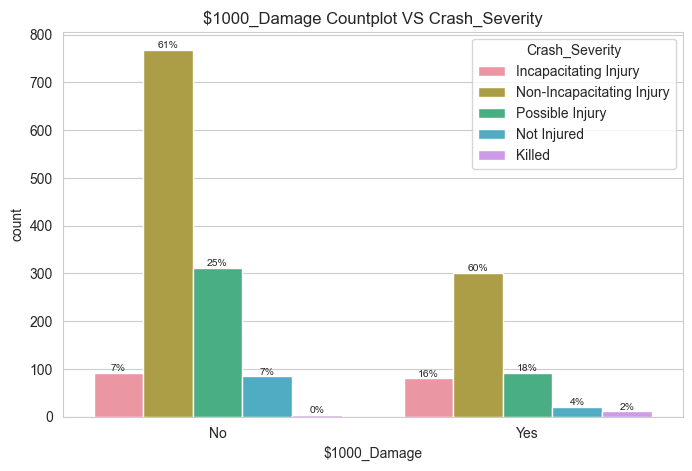

In [19]:
plt.figure(figsize=[8,5])
ax=sns.countplot(x='$1000_Damage',hue='Crash_Severity',data=df)
barPerc(df,'$1000_Damage',ax)
plt.title('$1000_Damage Countplot VS Crash_Severity')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


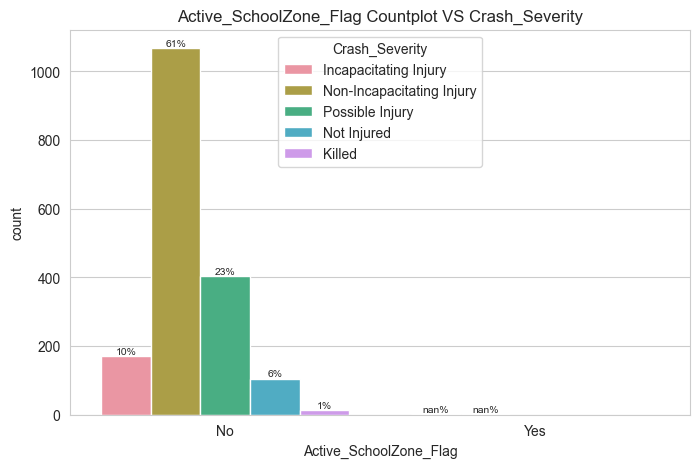

In [52]:
plt.figure(figsize=[8,5])
ax=sns.countplot(x='Active_SchoolZone_Flag',hue='Crash_Severity',data=df)
barPerc(df,'Active_SchoolZone_Flag',ax)
plt.title('Active_SchoolZone_Flag Countplot VS Crash_Severity')
plt.show()

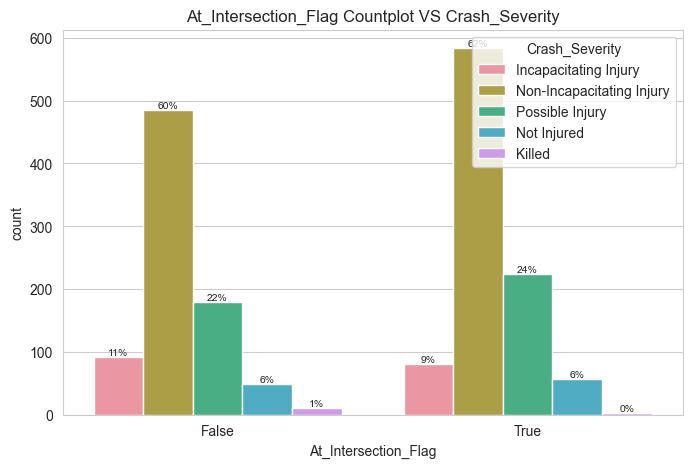

In [21]:
plt.figure(figsize=[8,5])
ax=sns.countplot(x='At_Intersection_Flag',hue='Crash_Severity',data=df)
barPerc(df,'At_Intersection_Flag',ax)
plt.title('At_Intersection_Flag Countplot VS Crash_Severity')
plt.show()

posx and posy should be finite values
posx and posy should be finite values


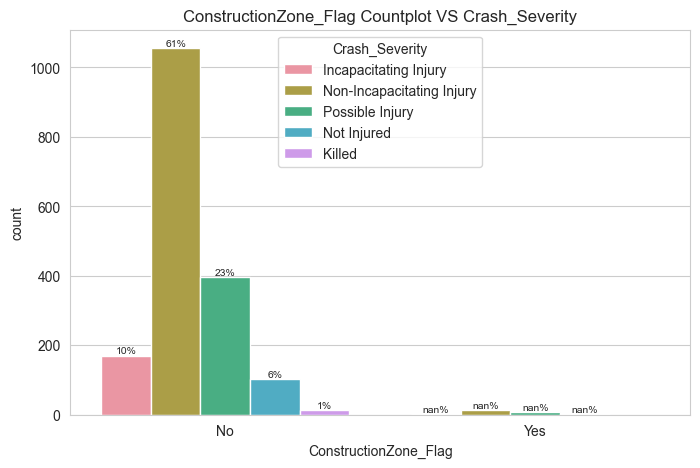

In [22]:
plt.figure(figsize=[8,5])
ax=sns.countplot(x='ConstructionZone_Flag',hue='Crash_Severity',data=df)
barPerc(df,'ConstructionZone_Flag',ax)
plt.title('ConstructionZone_Flag Countplot VS Crash_Severity')
plt.show()

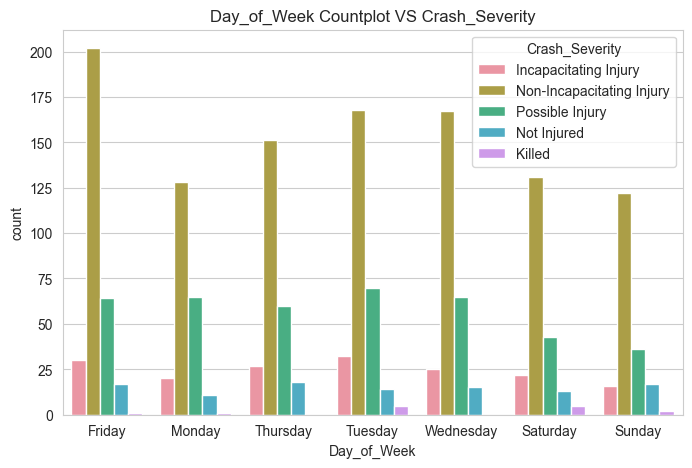

In [60]:
plt.figure(figsize=[8,5])
ax=sns.countplot(x='Day_of_Week',hue='Crash_Severity',data=df)
# barPerc(df,'Day_of_Week',ax)
plt.title('Day_of_Week Countplot VS Crash_Severity')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


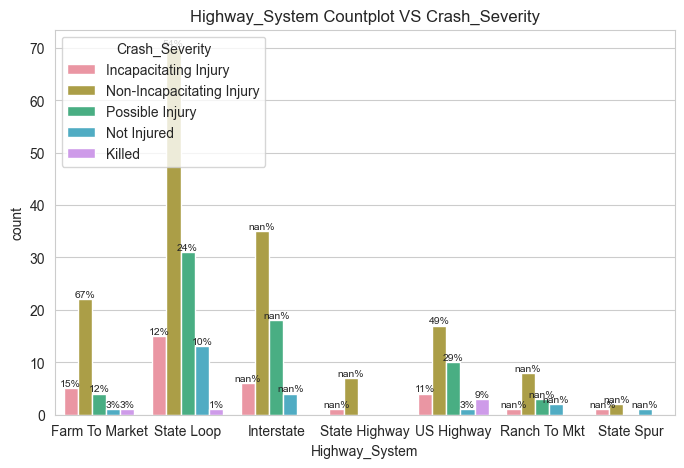

In [34]:
plt.figure(figsize=[8,5])
ax=sns.countplot(x='Highway_System',hue='Crash_Severity',data=df)
barPerc(df,'Highway_System',ax)
plt.title('Highway_System Countplot VS Crash_Severity')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


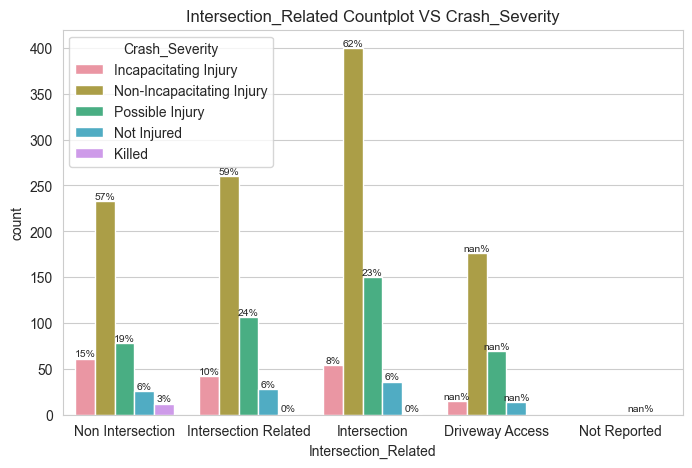

In [31]:
plt.figure(figsize=[8,5])
ax=sns.countplot(x='Intersection_Related',hue='Crash_Severity',data=df)
barPerc(df,'Intersection_Related',ax)
plt.title('Intersection_Related Countplot VS Crash_Severity')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


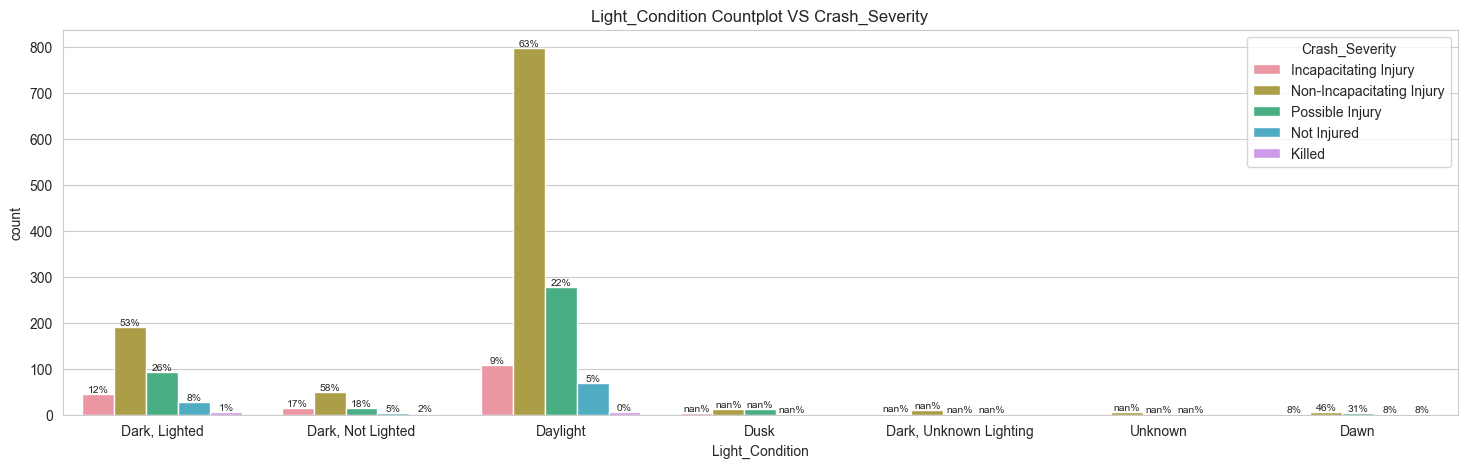

In [59]:
plt.figure(figsize=[18,5])
ax=sns.countplot(x='Light_Condition',hue='Crash_Severity',data=df)
barPerc(df,'Light_Condition',ax)
plt.title('Light_Condition Countplot VS Crash_Severity')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


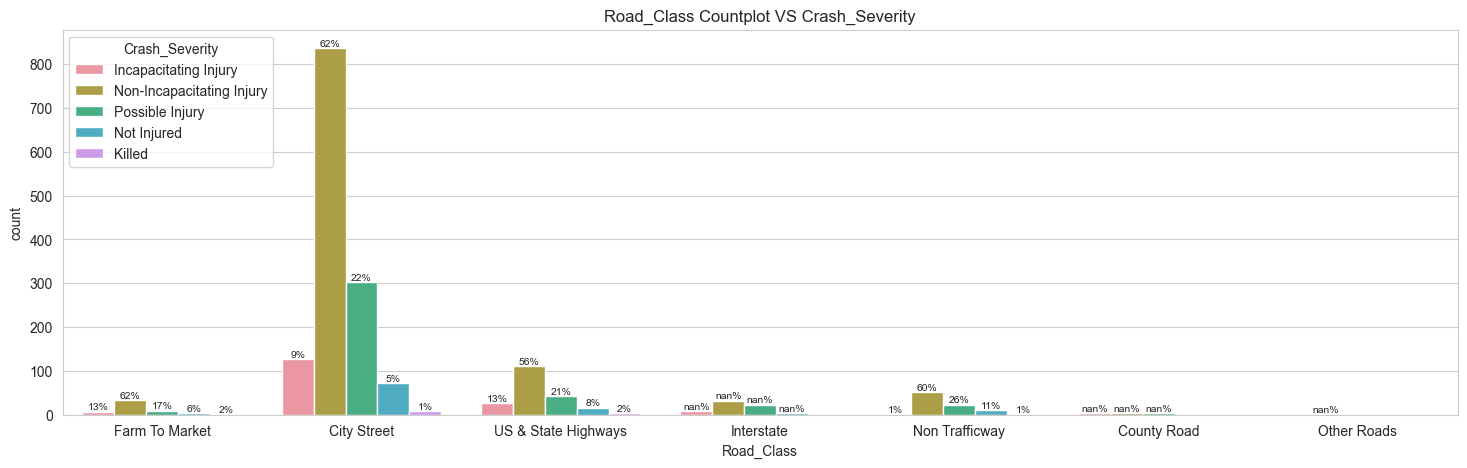

In [58]:
plt.figure(figsize=[18,5])
ax=sns.countplot(x='Road_Class',hue='Crash_Severity',data=df)
barPerc(df,'Road_Class',ax)
plt.title('Road_Class Countplot VS Crash_Severity')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


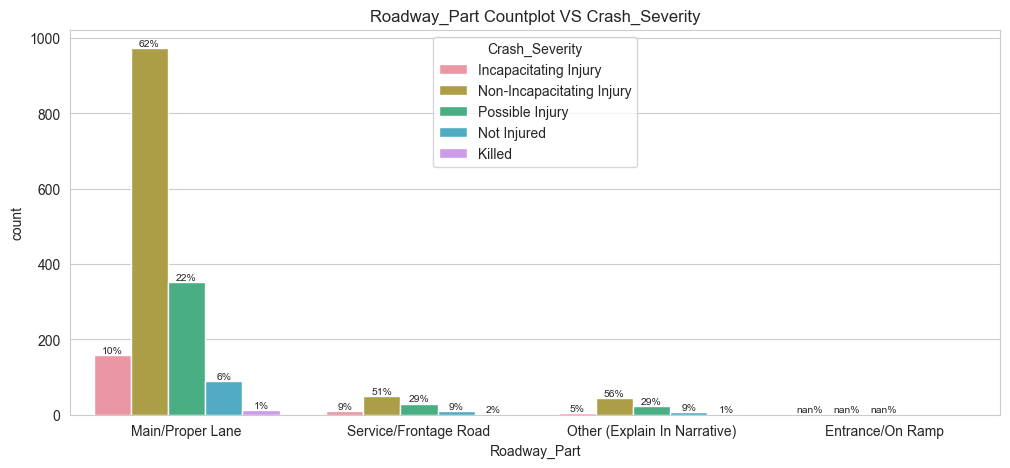

In [57]:
plt.figure(figsize=[12,5])
ax=sns.countplot(x='Roadway_Part',hue='Crash_Severity',data=df)
barPerc(df,'Roadway_Part',ax)
plt.title('Roadway_Part Countplot VS Crash_Severity')
plt.show()

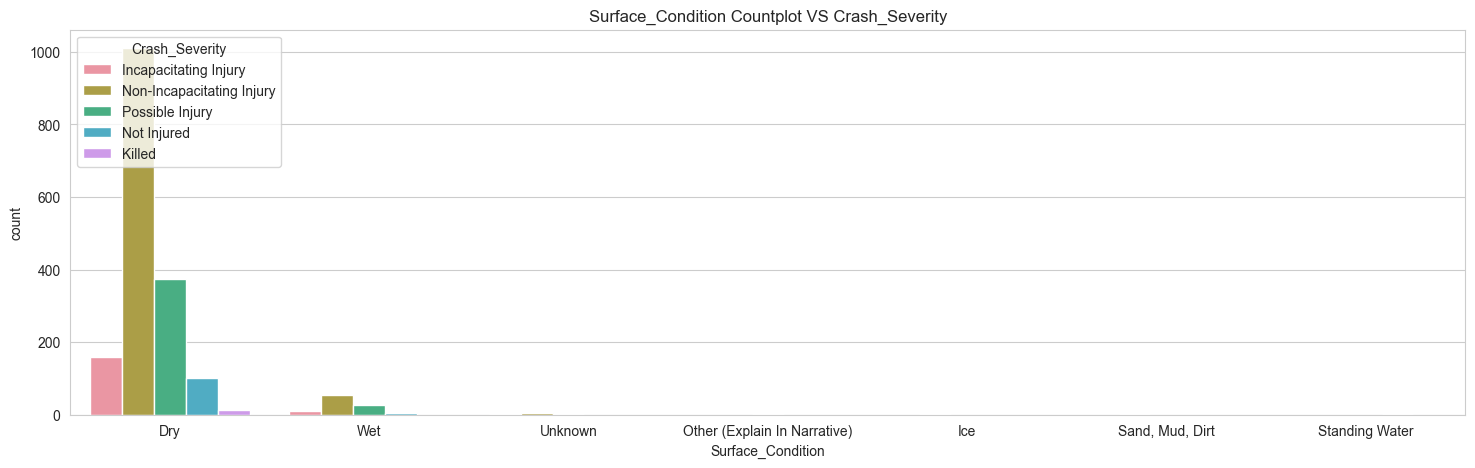

In [56]:
plt.figure(figsize=[18,5])
ax=sns.countplot(x='Surface_Condition',hue='Crash_Severity',data=df)
# barPerc(df,'Surface_Condition',ax)
plt.title('Surface_Condition Countplot VS Crash_Severity')
plt.show()

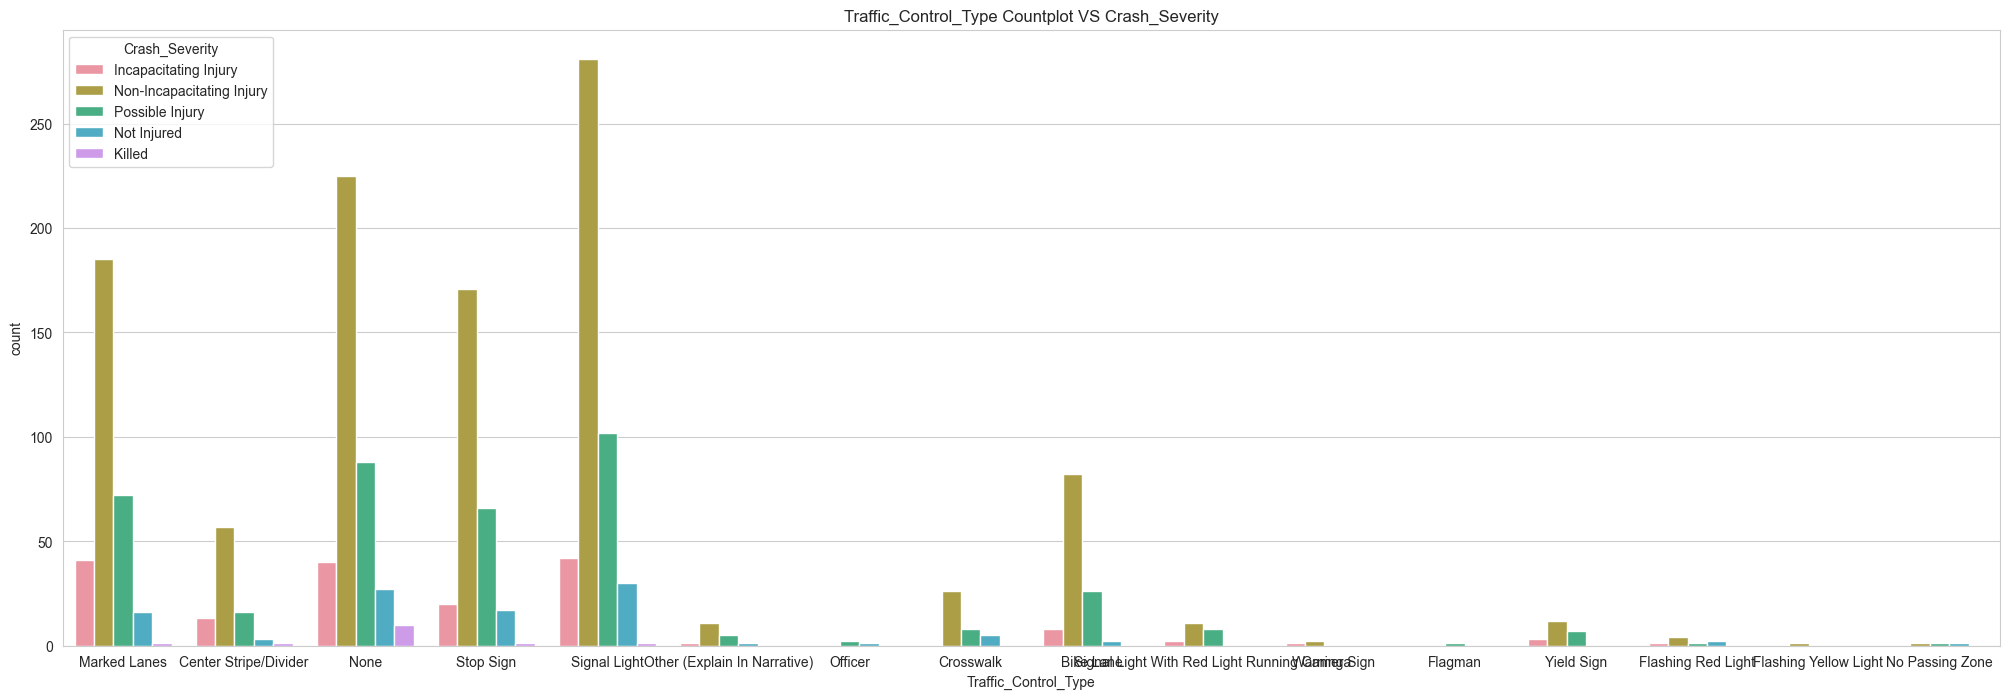

In [55]:
plt.figure(figsize=[25,8])
ax=sns.countplot(x='Traffic_Control_Type',hue='Crash_Severity',data=df)
# barPerc(df,'Traffic_Control_Type',ax)
plt.title('Traffic_Control_Type Countplot VS Crash_Severity')
plt.show()

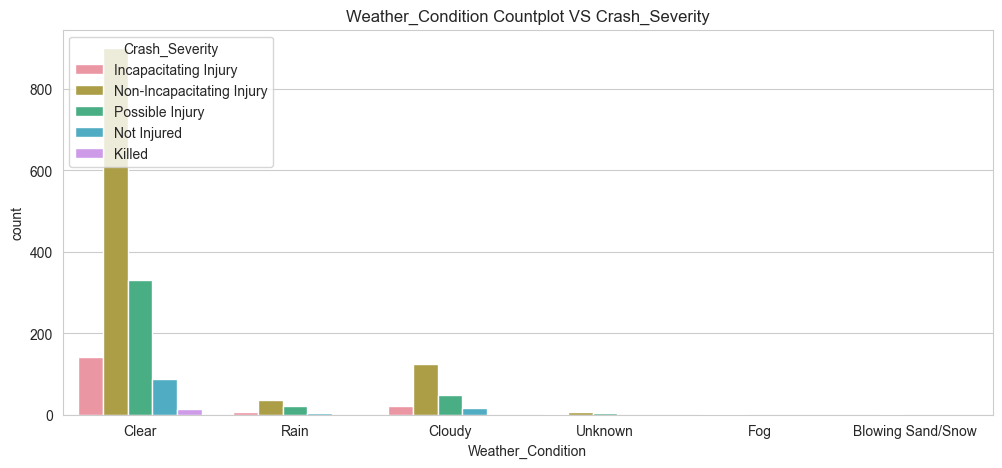

In [61]:
plt.figure(figsize=[12,5])
ax=sns.countplot(x='Weather_Condition',hue='Crash_Severity',data=df)
# barPerc(df,'Weather_Condition',ax)
plt.title('Weather_Condition Countplot VS Crash_Severity')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


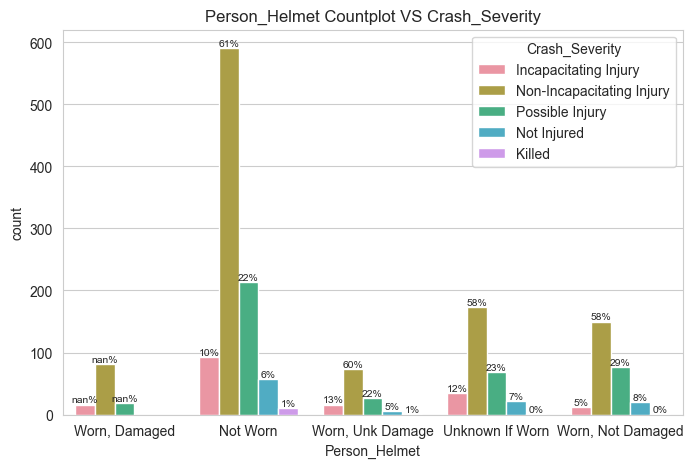

In [24]:
plt.figure(figsize=[8,5])
ax=sns.countplot(x='Person_Helmet',hue='Crash_Severity',data=df)
barPerc(df,'Person_Helmet',ax)
plt.title('Person_Helmet Countplot VS Crash_Severity')
plt.show()

## Bivariate Analysis

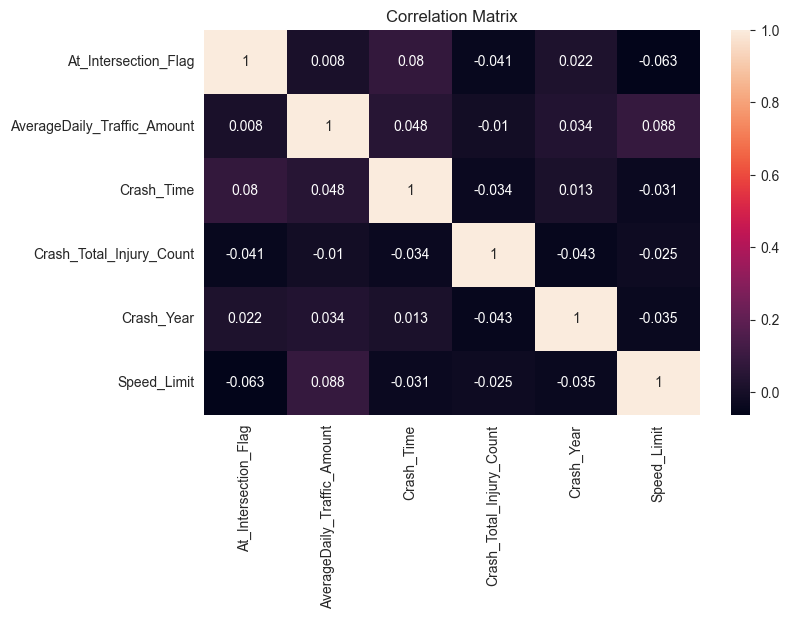

In [19]:
plt.figure(figsize=[8,5])
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Modeling

### Import Packages

In [23]:
import sklearn
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import learning_curve

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from numpy import loadtxt

In [24]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, plot_confusion_matrix, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report
import scikitplot as skplt

### Data Selection

"Speed Limit": The speed limit on the road where the crash occurred could have an impact on the likelihood and severity of a crash involving a cyclist and a motorcycle.

"Light Condition": The lighting conditions at the time of the crash could impact the visibility of the cyclists and motorcycles and the likelihood of a crash.

"Intersection Related": Whether the crash occurred at an intersection could be a factor in the likelihood of a crash involving a cyclist and a motorcycle.

"Weather Condition": The weather conditions at the time of the crash could impact visibility, road conditions, and the likelihood of a crash involving a cyclist and a motorcycle.

"Traffic Control Type": The type of traffic control (e.g. stop signs, traffic lights, roundabouts) in place at the time of the crash could impact the likelihood of a crash involving a cyclist and a motorcycle.

"Week of Day":If there are enough law enformancer?

These independent variables were selected based on the idea that the speed of vehicles on the road, visibility conditions, road geometry, weather, and traffic control measures are all factors that could impact the government's ability to protect cyclists from motorcycles.

In [42]:
df.head()

,$1000_Damage,Active_SchoolZone_Flag,At_Intersection_Flag,AverageDaily_Traffic_Amount,ConstructionZone_Flag,Crash_Severity,Crash_Time,Crash_Total_Injury_Count,Crash_Year,Day_of_Week,Highway_System,Intersection_Related,Light_Condition,Road_Class,Roadway_Part,Speed_Limit,Surface_Condition,Traffic_Control_Type,Weather_Condition,Person_Helmet
0,No,No,False,15262.0,No,Incapacitating Injury,239,1,2010,Friday,Farm To Market,Non Intersection,"Dark, Lighted",Farm To Market,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,No,No,False,NaN,No,Non-Incapacitating Injury,310,2,2010,Friday,NaN,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
4,No,No,False,22775.0,No,Non-Incapacitating Injury,2300,1,2010,Monday,State Loop,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,45,Dry,None,Clear,Not Worn
6,No,No,False,NaN,No,Non-Incapacitating Injury,1715,1,2010,Thursday,NaN,Intersection Related,Daylight,City Street,Main/Proper Lane,35,Dry,Marked Lanes,Clear,"Worn, Unk Damage"
7,No,No,True,NaN,No,Non-Incapacitating Injury,1826,1,2010,Tuesday,NaN,Intersection,"Dark, Lighted",City Street,Main/Proper Lane,30,Dry,Stop Sign,Clear,Not Worn


In [43]:
df1=df[['Crash_Severity','Intersection_Related','Weather_Condition','Light_Condition','Day_of_Week','Traffic_Control_Type','Speed_Limit']]
df1.head()

,Crash_Severity,Intersection_Related,Weather_Condition,Light_Condition,Day_of_Week,Traffic_Control_Type,Speed_Limit
0,Incapacitating Injury,Non Intersection,Clear,"Dark, Lighted",Friday,Marked Lanes,45
1,Non-Incapacitating Injury,Non Intersection,Clear,"Dark, Lighted",Friday,Center Stripe/Divider,35
4,Non-Incapacitating Injury,Intersection Related,Clear,"Dark, Not Lighted",Monday,None,45
6,Non-Incapacitating Injury,Intersection Related,Clear,Daylight,Thursday,Marked Lanes,35
7,Non-Incapacitating Injury,Intersection,Clear,"Dark, Lighted",Tuesday,Stop Sign,30


### Data Processing

In [44]:
X = df1.drop('Crash_Severity', axis = 1)
y = df1['Crash_Severity'] 

In [45]:
numeric_features = ["Speed_Limit"]
numeric_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='median')),
     ("scaler", StandardScaler())]
)

categorical_features = ["Intersection_Related", "Weather_Condition",'Light_Condition','Day_of_Week','Traffic_Control_Type']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)])

In [46]:
X_prepared=preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

In [47]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [56]:
pip install --upgrade imblearn

Note: you may need to restart the kernel to use updated packages.


In [58]:
from imblearn.combine import SMOTETomek
#Use Synthetic Minority Oversampling TEchnique to deal with imbalanced dataset

smk = SMOTETomek(sampling_strategy='auto', n_jobs=-1, k=5)
# Oversample training  data
X_train, y_train = smk.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape)
# Oversample validation data
X_test, y_test = smk.fit_resample(X_test, y_test)
print(X_test.shape, y_test.shape)

TypeError: __init__() got an unexpected keyword argument 'k'

In [29]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    
    
    # Get columns and bin edges
    def pair_bin_edges_columns(bins_edges, columns):
        all_edge_column = []
        for index in range(len(columns)):
            bin_edge = bins_edges[index]
            column = columns[index]
            
            pair_bin_edge = []
            # match consecutive bin edges together
            for first, second in zip(bin_edge, bin_edge[1:]):
                pair_bin_edge.append((first, second))
            
            bin_edge_column = [column +": ["+ str(edge[0]) +", "+ str(edge[1])+")"  for edge in pair_bin_edge]
            all_edge_column.extend(bin_edge_column)
        return all_edge_column
    
    
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            
            # For transformers that create bins
            if hasattr(trans, 'bin_edges_'):
                bins_edges = trans.bin_edges_
                pairs_edges_columns = pair_bin_edges_columns(bins_edges, column)
            if column is None:
                return []
            else:
                return [name + "__" + f for f in pairs_edges_columns]
        return [name + "__" + f for f in trans.get_feature_names(column)]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    for name, trans, column, _ in l_transformers:
        if type(trans) == Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [30]:
feature_names =get_feature_names(preprocessor)
feature_names

C:\Users\seagu\AppData\Local\Temp\ipykernel_24048\4172062041.py:47: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\seagu\AppData\Local\Temp\ipykernel_24048\4172062041.py:47: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


['num__Speed_Limit',
 'onehot__x0_Driveway Access',
 'onehot__x0_Intersection',
 'onehot__x0_Intersection Related',
 'onehot__x0_Non Intersection',
 'onehot__x0_Not Reported',
 'onehot__x1_Blowing Sand/Snow',
 'onehot__x1_Clear',
 'onehot__x1_Cloudy',
 'onehot__x1_Fog',
 'onehot__x1_Rain',
 'onehot__x1_Unknown',
 'onehot__x2_Dark, Lighted',
 'onehot__x2_Dark, Not Lighted',
 'onehot__x2_Dark, Unknown Lighting',
 'onehot__x2_Dawn',
 'onehot__x2_Daylight',
 'onehot__x2_Dusk',
 'onehot__x2_Unknown',
 'onehot__x3_Friday',
 'onehot__x3_Monday',
 'onehot__x3_Saturday',
 'onehot__x3_Sunday',
 'onehot__x3_Thursday',
 'onehot__x3_Tuesday',
 'onehot__x3_Wednesday',
 'onehot__x4_Bike Lane',
 'onehot__x4_Center Stripe/Divider',
 'onehot__x4_Crosswalk',
 'onehot__x4_Flagman',
 'onehot__x4_Flashing Red Light',
 'onehot__x4_Flashing Yellow Light',
 'onehot__x4_Marked Lanes',
 'onehot__x4_No Passing Zone',
 'onehot__x4_None',
 'onehot__x4_Officer',
 'onehot__x4_Other (Explain In Narrative)',
 'onehot__

## Implement Models

### Logistic Regression

In [31]:
#Grid Search for logistic regression
log_reg_params= {'penalty': ['l1', 'l2','elasticnet'],'C':[100, 10, 1.0, 0.1, 0.01],'solver' : ['lbfgs','newton-cg','liblinear','sag','saga']}
model = LogisticRegression(multi_class='multinomial')
log_reg_grid = GridSearchCV(model, param_grid=log_reg_params, cv=5,scoring = "accuracy")
log_reg_grid.fit(X_train, y_train)

c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs fa

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [32]:
print(f'Logistic Regression:\n\t *best params: {log_reg_grid.best_params_}\n\t *best score: {log_reg_grid.best_score_}')

Logistic Regression:
	 *best params: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
	 *best score: 0.6134751773049646


In [33]:
#### Using Optimal values of Hyperparameters
best_log_reg = LogisticRegression(C=0.1,penalty='l1',solver='saga')
best_log_reg.fit(X_train, y_train)

log_reg_predicted = best_log_reg.predict(X_test)

# calculating the probabilities
y_pred_proba = best_log_reg.predict_proba(X_test)

c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [37]:
print('Logistic Regression Model accuracy score with grid search on test set: {0:0.4f}'. format(accuracy_score(y_test, log_reg_predicted)))
print('Logistic Regression Model accuracy score with grid search on train set: {0:0.4f}'. format(best_log_reg.score(X_train,y_train)))

print('Logistic Regression Model Training error =', 100*(1-best_log_reg.score(X_train,y_train)), '%')
print('Logistic Regression Model Testing error', 100*(1-best_log_reg.score(X_test,y_test)), '%')

print(classification_report(y_test, log_reg_predicted))

Logistic Regression Model accuracy score with grid search on test set: 0.5779
Logistic Regression Model accuracy score with grid search on train set: 0.6135
Logistic Regression Model Training error = 38.652482269503544 %
Logistic Regression Model Testing error 42.20963172804532 %
                           precision    recall  f1-score   support

    Incapacitating Injury       0.00      0.00      0.00        38
                   Killed       0.00      0.00      0.00         1
Non-Incapacitating Injury       0.58      1.00      0.73       204
              Not Injured       0.00      0.00      0.00        18
          Possible Injury       0.00      0.00      0.00        92

                 accuracy                           0.58       353
                macro avg       0.12      0.20      0.15       353
             weighted avg       0.33      0.58      0.42       353



c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
coef_tans=best_log_reg.coef_.transpose()
coef = [i[0] for i in coef_tans]

feat_importances = pd.DataFrame({"Feature_Name":get_feature_names(preprocessor),"coef":coef})
feat_importances = feat_importances[['Feature_Name','coef']]# reorder the columns
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)
feat_importances

C:\Users\seagu\AppData\Local\Temp\ipykernel_24048\4172062041.py:47: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\seagu\AppData\Local\Temp\ipykernel_24048\4172062041.py:47: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


,Feature_Name,coef,importances
0,num__Speed_Limit,0.166225,0.166225
4,onehot__x0_Non Intersection,0.050697,0.050697
32,onehot__x4_Marked Lanes,0.000000,0.000000
24,onehot__x3_Tuesday,0.000000,0.000000
25,onehot__x3_Wednesday,0.000000,0.000000
26,onehot__x4_Bike Lane,0.000000,0.000000
27,onehot__x4_Center Stripe/Divider,0.000000,0.000000
28,onehot__x4_Crosswalk,0.000000,0.000000
29,onehot__x4_Flagman,0.000000,0.000000
30,onehot__x4_Flashing Red Light,0.000000,0.000000


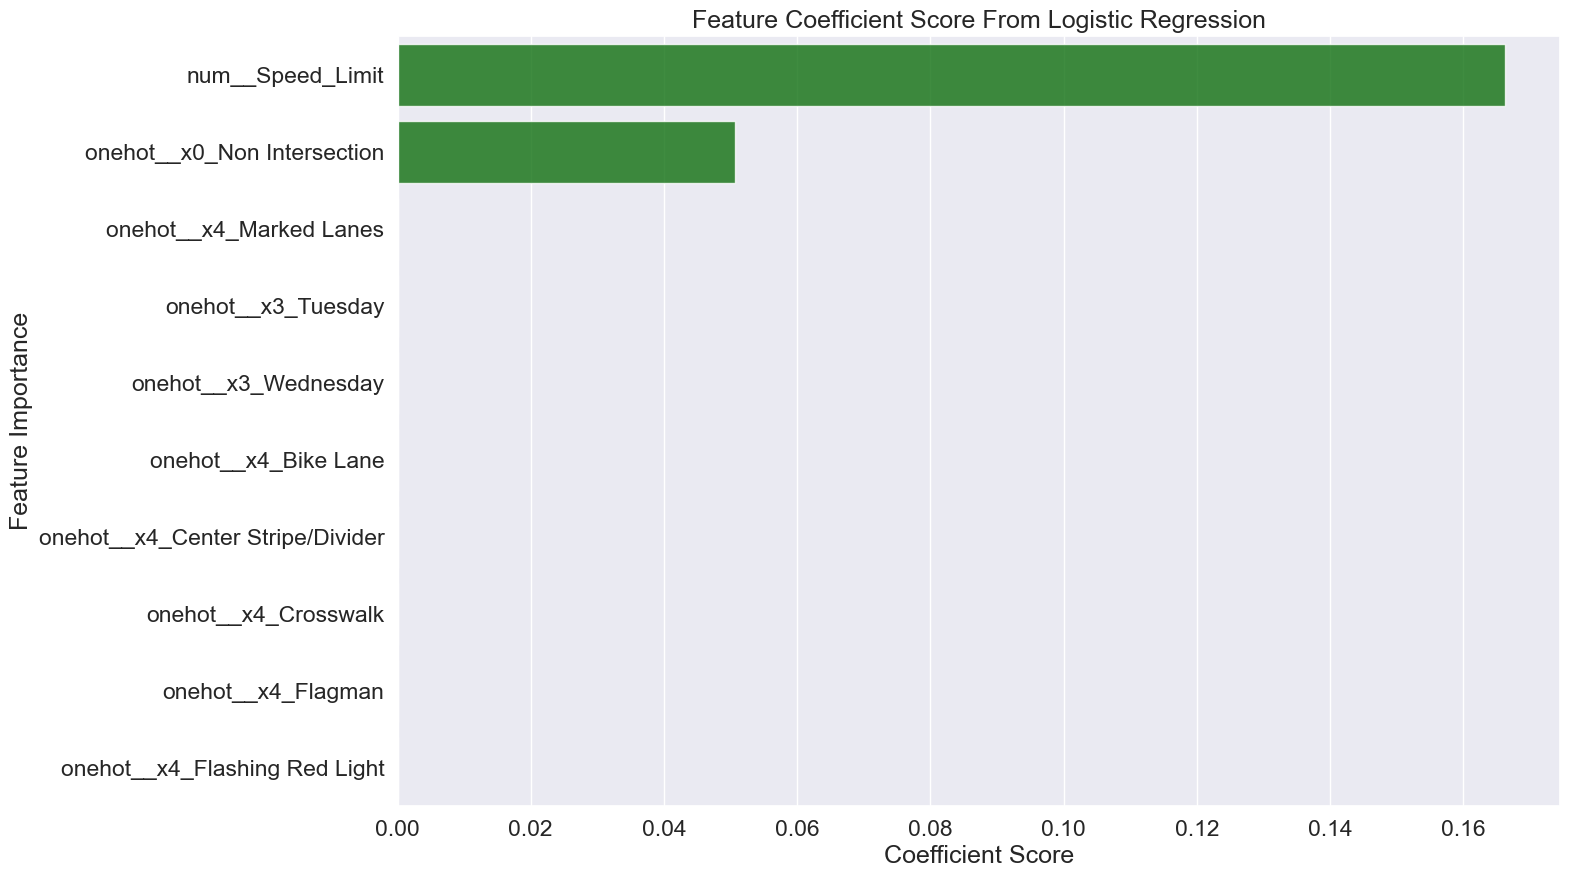

In [41]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,10))
cols = ['red' if x < 0 else 'green' for x in feat_importances.coef]
sns.barplot(x=feat_importances[0:10].coef,y=feat_importances[0:10].Feature_Name,alpha=0.8, palette=cols)
plt.title('Feature Coefficient Score From Logistic Regression')
plt.ylabel('Feature Importance')
plt.xlabel('Coefficient Score')
plt.show()

### Random Forest

In [92]:
#Grid Search for randomforest
rf_params = {'n_estimators': [5000],
            'criterion': ['gini', 'entropy'],
            'max_features': [4,6,9,12],
            'min_samples_split': [2,5,10],
            'max_depth':np.arange(1, 20,5)} 
CV_rfc = GridSearchCV(RandomForestClassifier(), rf_params, cv=5,verbose=0, scoring = "accuracy")              
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  6, 11, 16]),
                         'max_features': [4, 6, 9, 12],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5000]},
             scoring='accuracy')

In [93]:
print(f'Random Forest:\n\t *best params: {CV_rfc.best_params_}\n\t *best score: {CV_rfc.best_score_}')

Random Forest:
	 *best params: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 5000}
	 *best score: 0.6141843971631206


In [59]:
#### Using Optimal values of Hyperparameters
best_rf = RandomForestClassifier(criterion='entropy',n_estimators=5000,max_features=4,max_depth=16,min_samples_split=10)
best_rf.fit(X_train, y_train)
best_rf_predicted = best_rf.predict(X_test)

In [61]:
# print prediction results
print('Model accuracy score with Grid Search on train set: {0:0.4f}'. format(best_rf.score(X_train,y_train)))
print('Model accuracy score with Grid Search on test set: {0:0.4f}'. format(accuracy_score(y_test, best_rf_predicted)))
print('Training error =', 100*(1-best_rf.score(X_train,y_train)), '%')
print('Testing error', 100*(1-best_rf.score(X_test,y_test)), '%')
print(classification_report(y_test, best_rf_predicted))

Model accuracy score with Grid Search on train set: 0.9050
Model accuracy score with Grid Search on test set: 0.4958
Training error = 9.495136637332102 %
Testing error 50.42492917847026 %
                           precision    recall  f1-score   support

    Incapacitating Injury       0.15      0.13      0.14        38
                   Killed       0.00      0.00      0.00         1
Non-Incapacitating Injury       0.61      0.74      0.67       204
              Not Injured       0.00      0.00      0.00        18
          Possible Injury       0.37      0.22      0.27        92

                 accuracy                           0.50       353
                macro avg       0.23      0.22      0.22       353
             weighted avg       0.46      0.50      0.47       353



In [62]:
feature_importance=pd.DataFrame({"Feature_Name":get_feature_names(preprocessor),"Coef":best_rf.feature_importances_})
feature_importance = feature_importance[['Feature_Name','Coef']]
feature_importance['Importances']=np.abs(feature_importance['Coef'])
feature_importance.sort_values(by='Importances',inplace=True, ascending=False)

C:\Users\seagu\AppData\Local\Temp\ipykernel_24048\4172062041.py:47: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\seagu\AppData\Local\Temp\ipykernel_24048\4172062041.py:47: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


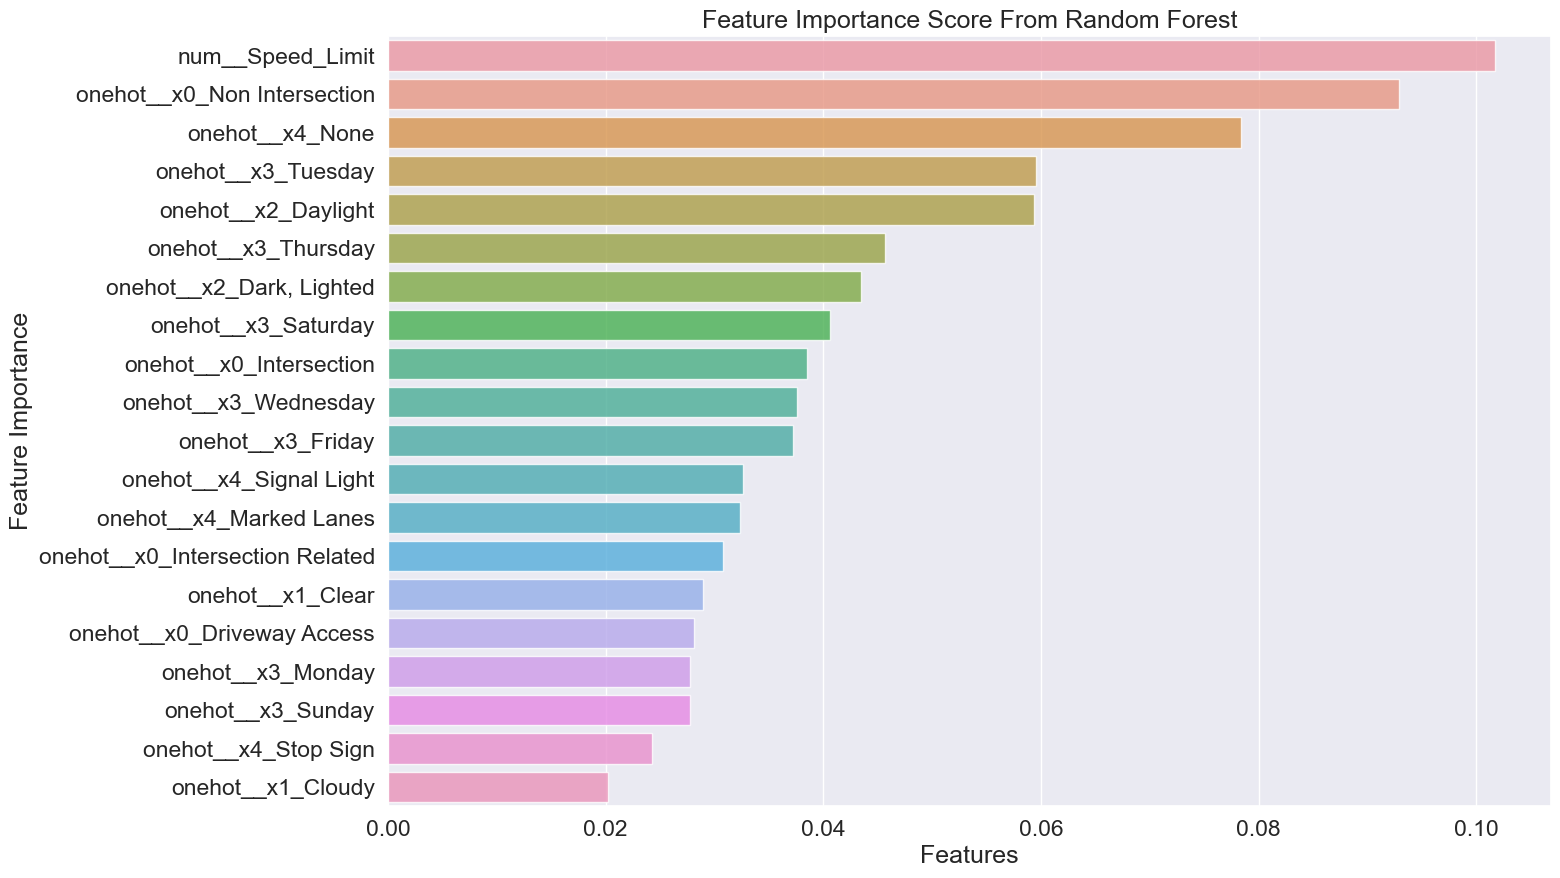

In [63]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,10))
sns.barplot(feature_importance[0:20].Coef,feature_importance[0:20].Feature_Name,alpha=0.8)
plt.title('Feature Importance Score From Random Forest')
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.show()

### Neural Network

In [64]:
from sklearn.neural_network import MLPClassifier

In [65]:
# Define the parameter grid for grid search
mlp_param_= {
    'hidden_layer_sizes': [(10,), (20,), (30,), (40,), (50,), (60,), (70,), (80,), (90,), (100,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive']
}
mlp = MLPClassifier(max_iter=1000)
mlp_grid = GridSearchCV(mlp, param_grid=mlp_param_,cv=5, n_jobs=-1)
mlp_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(10,), (20,), (30,), (40,),
                                                (50,), (60,), (70,), (80,),
                                                (90,), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [66]:
print(f'Neural Network:\n\t *best params: {mlp_grid.best_params_}\n\t *best score: {mlp_grid.best_score_}')

Neural Network:
	 *best params: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (90,), 'learning_rate': 'constant', 'solver': 'adam'}
	 *best score: 0.8075624436719455


In [67]:
# Define the neural network model
mlp = MLPClassifier(hidden_layer_sizes=(90,), activation='tanh', solver='adam', alpha=0.001,learning_rate='constant')
mlp.fit(X_train, y_train)
mlp_predicted = mlp.predict(X_test)

# calculating the probabilities
y_pred_proba = mlp.predict_proba(X_test)

c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [82]:
# print prediction results
print('Model accuracy score on train set: {0:0.4f}'. format(mlp.score(X_train,y_train)))
print('Model accuracy score on test set: {0:0.4f}'. format(accuracy_score(y_test, mlp_predicted)))
print('Training error =', 100*(1-mlp.score(X_train,y_train)), '%')
print('Testing error', 100*(1-mlp.score(X_test,y_test)), '%')

print(classification_report(y_test, mlp_predicted))

Model accuracy score on train set: 0.7849
Model accuracy score on test set: 0.3654
Training error = 21.514590088003704 %
Testing error 63.45609065155807 %
                           precision    recall  f1-score   support

    Incapacitating Injury       0.09      0.16      0.12        38
                   Killed       0.00      0.00      0.00         1
Non-Incapacitating Injury       0.63      0.44      0.52       204
              Not Injured       0.07      0.17      0.10        18
          Possible Injury       0.35      0.33      0.34        92

                 accuracy                           0.37       353
                macro avg       0.23      0.22      0.21       353
             weighted avg       0.47      0.37      0.41       353



In [91]:
# get the weights of the input layer
input_weights = mlp.coefs_[0]
# calculate the feature importance scores
feature_importances = np.mean(np.abs(input_weights), axis=1)

features=get_feature_names(preprocessor)

C:\Users\seagu\AppData\Local\Temp\ipykernel_24048\4172062041.py:47: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\seagu\AppData\Local\Temp\ipykernel_24048\4172062041.py:47: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


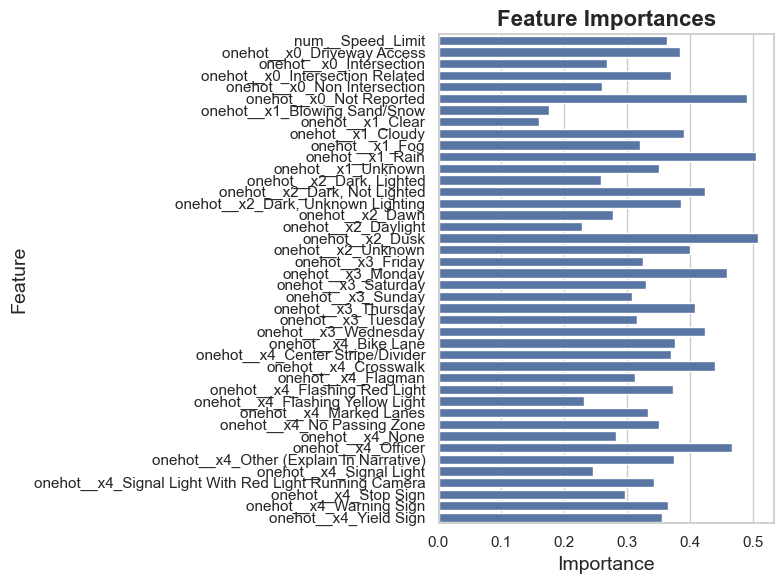

In [95]:
# create a dictionary of feature names and their importances
feature_dict = {feature: importance for feature, importance in zip(features, feature_importances)}

# create a sorted list of features based on importance
sorted_features = sorted(feature_dict, key=feature_dict.get, reverse=True)

# create a horizontal bar plot of feature importances
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=list(feature_dict.values()), y=list(feature_dict.keys()), color="b")
ax.set_title("Feature Importances", fontsize=16, fontweight="bold")
ax.set_xlabel("Importance", fontsize=14)
ax.set_ylabel("Feature", fontsize=14)
plt.tight_layout()
plt.show()

# Model Comparison

In [71]:
#calculate the accuracy for each model
lr_acc=best_log_reg.score(X_test,y_test)
rf_acc=best_rf.score(X_test,y_test)
mlp_acc=mlp.score(X_test,y_test)

In [99]:
# calculate precision and recall scores for each model
lr_pre, lr_recall = precision_score(y_test, log_reg_predicted, average=None), recall_score(y_test, log_reg_predicted, average=None)
rf_pre, rf_recall = precision_score(y_test, best_rf_predicted, average=None), recall_score(y_test, best_rf_predicted, average=None)
mlp_pre, mlp_recall = precision_score(y_test, mlp_predicted, average=None), recall_score(y_test, mlp_predicted, average=None)


c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

# F-1 score
lr_f1 = f1_score(y_test, log_reg_predicted, average='weighted')
rf_f1 = f1_score(y_test, best_rf_predicted, average='weighted')
mlp_f1 = f1_score(y_test, mlp_predicted, average='weighted')

# calculating the probabilities
log_reg_predicted_proba = best_log_reg.predict_proba(X_test)
best_rf_predicted_proba = best_rf.predict_proba(X_test)
mlp_predicted_proba = mlp.predict_proba(X_test)
# ROC-AUC score
lr_roc_auc = roc_auc_score(y_test, log_reg_predicted_proba, multi_class='ovr', average='weighted')
rf_roc_auc = roc_auc_score(y_test, best_rf_predicted_proba, multi_class='ovr', average='weighted')
mlp_roc_auc = roc_auc_score(y_test, mlp_predicted_proba, multi_class='ovr', average='weighted')

In [105]:
models = ['Logistic Regression', 'Random Forest', 'MLP']
accuracy = [lr_acc,rf_acc, mlp_acc]
recall=[lr_recall,rf_recall,mlp_recall]
precision=[lr_pre,rf_pre,mlp_pre]
f1_Score=[lr_f1,rf_f1,mlp_f1]
roc_auc_score=[lr_roc_auc,rf_roc_auc,mlp_roc_auc]

d = {'accuracy': accuracy,'recall':recall,'precision':precision,'F1_Score':f1_Score,'roc_auc_score':roc_auc_score}
df_metrics = pd.DataFrame(d, index = models)
df_metrics

,accuracy,recall,precision,F1_Score,roc_auc_score
Logistic Regression,0.577904,"[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.5779036827195467, 0.0, 0.0]",0.423312,0.585680
Random Forest,0.495751,"[0.13157894736842105, 0.0, 0.7352941176470589, 0.0, 0.21739130434782608]","[0.15151515151515152, 0.0, 0.6072874493927125, 0.0, 0.37037037037037035]",0.470980,0.548904
MLP,0.365439,"[0.15789473684210525, 0.0, 0.4411764705882353, 0.16666666666666666, 0.32608695652173914]","[0.09375, 0.0, 0.6293706293706294, 0.06666666666666667, 0.35294117647058826]",0.405645,0.531514
